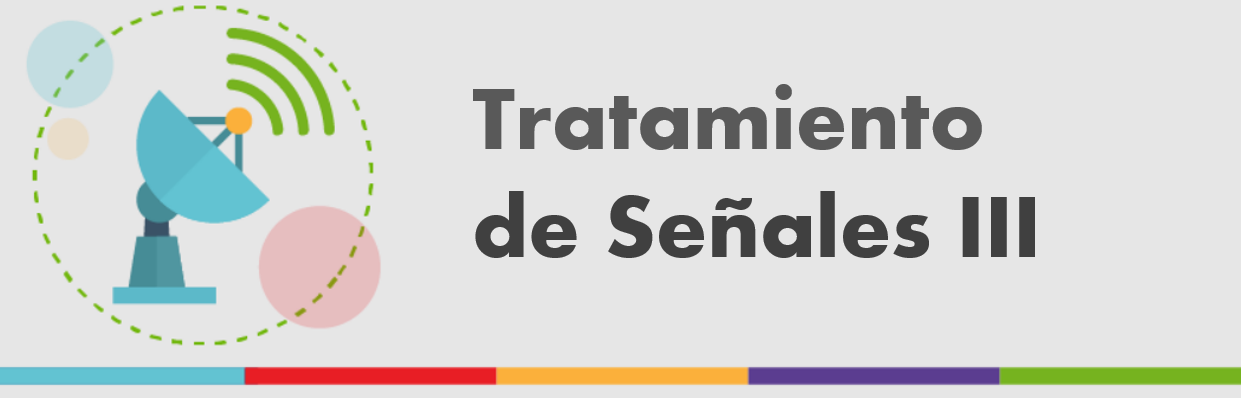
---
- **UNIVERSIDAD DE ANTIOQUIA**
- **Facultad de Ingeniería**
- **Profesor:** Hernán Felipe García Arias
- **Alumno:** Sebastian Orozco Blandon
- **Ingeniería de Telecomunicaciones**
- **2023-2**

---

## Final Project Assignment: Modulation Recognition Using Convolutional Neural Networks (CNN) with Database


**Objective:**
- The objective of this final project is to design and implement a modulation recognition system using Convolutional Neural Networks (CNN). The project will involve building a robust CNN model capable of accurately classifying different modulation schemes present in the provided database (RadioML2016). Modulation recognition is a crucial task in wireless communication systems, and your implementation will contribute to the advancement of signal processing in communications.

**Dataset:**
- You will be provided with a dataset (Database RadioML2016) containing samples of signals with various modulation schemes. The dataset is divided into training and testing sets. It is essential to preprocess the data appropriately to feed it into the CNN model.

**Tasks:**

1. Data Preprocessing: Load and explore the dataset to understand its structure and characteristics.
Preprocess the data, including normalization, resizing, and any other necessary steps to prepare it for input into the CNN.
2. CNN Model Architecture:
Design a CNN architecture suitable for modulation recognition. Consider the input shape, number of layers, filter sizes, and activation functions.
Implement the CNN model using a deep learning framework of your choice (e.g., TensorFlow, PyTorch, Keras).
3. Training: Split the dataset into training and validation sets.
Train the CNN model using the training set, monitoring and optimizing for performance on the validation set.
Experiment with different hyperparameters to enhance the model's accuracy.
4. Evaluation: Evaluate the trained model on the testing set to assess its performance in recognizing modulation schemes.
Calculate relevant metrics such as accuracy, precision, recall, and F1 score.
5. Analysis and Visualization: Provide visualizations of the training/validation loss and accuracy over epochs.
Analyze the confusion matrix to understand the model's performance on different modulation schemes.
6. Documentation: Prepare a comprehensive notebook report documenting the entire project, including data exploration, model architecture, training process, evaluation results, and analysis. Include code documentation and comments for clarity.
7. Presentation: Prepare a pitch presentation summarizing key aspects of your project.
Present the motivation, methodology, results, and any challenges faced during the implementation.
8. Submission Guidelines: Submit the project code along with a README file providing instructions on how to run the code (use GIT).
9. Submit the project report in a clear and organized format on GIT repo.
10. Ensure that your implementation is well-documented, and your code follows best practices.


*This final project will not only test your understanding of modulation recognition and CNNs but also your ability to apply machine learning concepts to real-world signal processing challenges.*

Good luck!







-

## Reconocimiento de modulación: conjunto de datos Radio Machine Learning 2016.10a

More information on this classification method can be found at
https://arxiv.org/abs/1602.04105

More information on the RML2016.10a dataset can be found at
http://pubs.gnuradio.org/index.php/grcon/article/view/11

Please cite derivative works

```
@article{convnetmodrec,
  title={Convolutional Radio Modulation Recognition Networks},
  author={O'Shea, Timothy J and Corgan, Johnathan and Clancy, T. Charles},
  journal={arXiv preprint arXiv:1602.04105},
  year={2016}
}
@article{rml_datasets,
  title={Radio Machine Learning Dataset Generation with GNU Radio},
  author={O'Shea, Timothy J and West, Nathan},
  journal={Proceedings of the 6th GNU Radio Conference},
  year={2016}
}
```

Para ejecutar este ejemplo, deberá descargar o generar el conjunto de datos RML2016.10a (https://radioml.com/datasets/)
También necesitarás Keras instalado con el backend de Theano o Tensor Flow funcionando!

In [1]:
!gdown '1Yuj_rq3EEITslOQ0AHEl2HKzDovMQH3K'

Downloading...
From: https://drive.google.com/uc?id=1Yuj_rq3EEITslOQ0AHEl2HKzDovMQH3K
To: /content/RML2016.10a_dict.pkl
100% 641M/641M [00:21<00:00, 30.0MB/s]


In [2]:
import os,random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, sys
%matplotlib inline

## Keras
[Keras](https://keras.io/) is a python abstraction which allows you to define a neural network and have it automatically coded for deep learning libraries (currently DeepLearning4j, TensorFlow, and Theano). You just tell Keras how many layers are in the network model and define what those layers look like. Keras handles converting it into something that TensorFlow and Theano can use. So it's great for rapid development experimentation with neural networks. You can quickly build things and quickly tweak neural networks.

In [3]:
from tensorflow import keras
from keras.utils import to_categorical
import tensorflow.keras.models as models
from tensorflow.keras.layers import Reshape,Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.regularizers import *
#from tensorflow.keras.optimizers import adam

# Dataset setup

O'Shea, Corgan, and Clancy generated a simulated data set using [GNU Radio](http://gnuradio.org). It is saved as a Pickle file. That's just a binary file that can be read into Python (it is a dictionary, similar to a JSON file).

There are other data files that you can use to train and test the model at the [radioml.com](https://radioml.com/datasets/radioml-2016-10-dataset/) website.  The Python file to create the dataset is [here](https://github.com/radioML/dataset/blob/master/generate_RML2016.10a.py).

In [4]:
# Load the dataset ...
#  You will need to seperately download (radioml.com) or generate this file
with open("RML2016.10a_dict.pkl", 'rb') as f:
    Xd = pickle.load(f, encoding="latin1")

## Pickle format

The data that was saved contained one large Python dictionary array. The dictionary keys were the combinations of [modulation](https://en.wikipedia.org/wiki/Phase-shift_keying) type and signal to noise (SNR) ratios that were simulated by GNU Radio to produce the data. There are 11 modulation schemes: 8 digital and 3 analog. Gaussian white noise was added to each signal proportional to the signal's power.

For example, a [BPSK modulated](https://en.wikipedia.org/wiki/Phase-shift_keying#Binary_phase-shift_keying_.28BPSK.29) signal was simulated with SNRs of -20 dB, -18 dB, -16 dB, up to 18 dB. For a SNR of 0, the BPSK signal would have the same total power as the gaussian noise. For SNRs less than 0, the BPSK signal would be swamped by the noise. In other words, it'd be impossible for a human to identify the modulation for those SNRs.

$$ \text{SNR in decibels} = 10 \times \log \left ( \frac{\text{signal power}}{\text{noise power}} \right ) $$

In [5]:
# Calculate modulations and signal-to-noise ratios contained in dataset
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])

In [6]:
print('These are the modulation schemes in the dataset: {}'.format(mods))
print('These are the signal to noise ratios in the dataset: {}'.format(snrs))

These are the modulation schemes in the dataset: ['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
These are the signal to noise ratios in the dataset: [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


### Radio frequency (RF) signals

Once we've specified the dictionary key (e.g. ['QAM64', 4] for QAM64 modulation @ 4 dB SNR), then we'll be left with the following matrix.

In [7]:
np.shape(Xd['BPSK', -18])

(1000, 2, 128)

+ The second dimension represents the two components ([I & Q](https://youtu.be/h_7d-m1ehoY)) of the RF signal.
+ The third dimension represents the 128 samples in time (1 MHz so 1 $\mu$s per index)
+ The first dimension represents the 1,000 sampled windows (each window has the 128 I & Q samples)

# Calculating the raw signal.

$$\text{Modulated Carrier RF} = I \cos(2\pi ft) + Q \sin(2 \pi ft)$$

In [8]:
'''
Compute the original RF signal from the I & Q components.
'''
def reconstructSignal(s):
    I = s[0,:]   # I component
    Q = s[1,:]   # Q component
    n = len(I)   # number of samples
    f = 1e6     # Carrier frequency
    return I*np.cos(2*np.pi*f*np.arange(n)) + Q*np.sin(2*np.pi*f*np.arange(n))

## Let's plot some of the raw data

So we'll just choose one 8PSK (with SNR @ 18 dB), one PAM4 (with SNR @ 6 dB), one BPSK (with SNR @ 0 dB), and one QAM64 (with SNR @ -12 dB).

Notice how the signal gets buried in the noise as the SNR decreases.

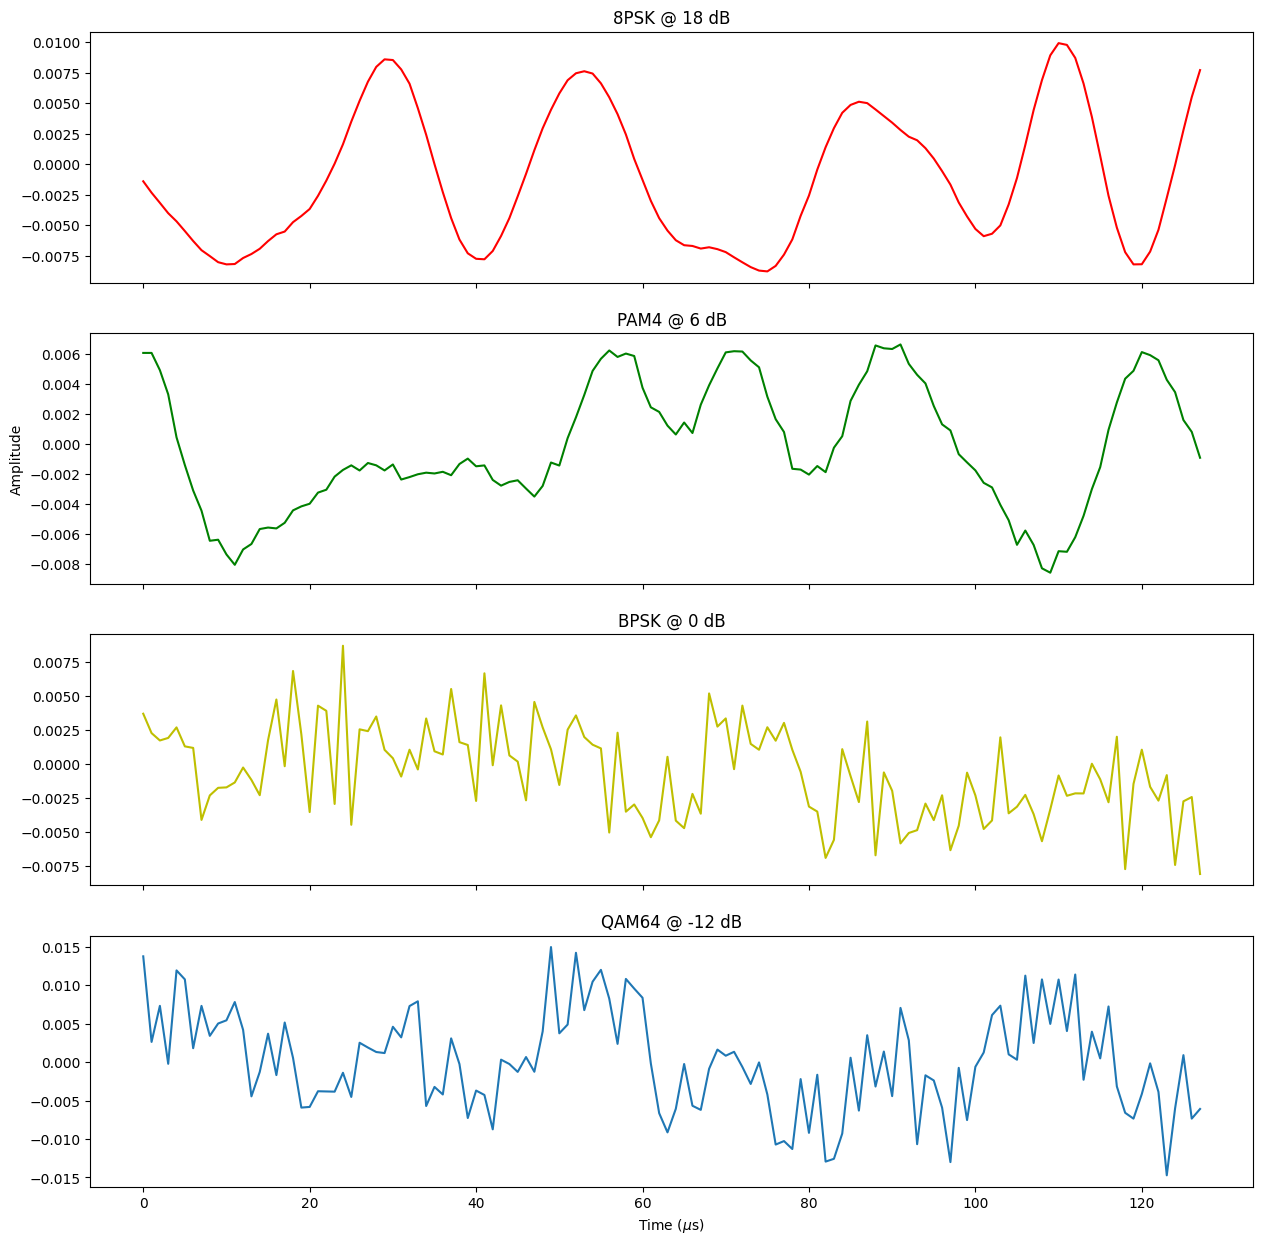

In [9]:
# Plot some of the data
nFigs = 4

plt.figure(figsize=(15, 15))

ax1 = plt.subplot(nFigs, 1, 1);
plt.plot(reconstructSignal(Xd['8PSK', 18][2,:,:]), color='r');
plt.title('8PSK @ 18 dB')

ax2 = plt.subplot(nFigs, 1, 2, sharex=ax1);
plt.plot(reconstructSignal(Xd['PAM4', 6][99,:,:]), color='g');
plt.title('PAM4 @ 6 dB')

plt.ylabel('Amplitude');

ax3 = plt.subplot(nFigs, 1, 3, sharex=ax1)
plt.plot(reconstructSignal(Xd['BPSK', 0][456,:,:]), color='y');
plt.title('BPSK @ 0 dB')

ax4 = plt.subplot(nFigs, 1, 4, sharex=ax1)
plt.plot(reconstructSignal(Xd['QAM64', -12][32,:,:]));
plt.title('QAM64 @ -12 dB')

# We only need to show the xticks on the bottom subplot
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)

plt.xlabel(r'Time ($\mu$s)');

## Now we need to append all of the modulation, SNR, samples, channels, and time points into one big matrix to pass into our neural net.

So there will be 220,000 samples. Each sample is 2 x 128. The 2 are the I and Q channels. The 128 are the 128 time samples of the waveform (sampled at 1 MHz).

In [10]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

## Add noise class to dataset

So let's just add 2 channels of random Gaussian noise to see if we can give the network an option to pick if it can't decide between the true modulations. This is basically an "I don't know" classification.

In [12]:
numNoiseSamples = 20000 # Add 20,000 samples of just Gaussian noise
for i in range(numNoiseSamples):
    lbl.append(['Noise', snrs[i%len(snrs)]])

mods.append('Noise')
X_noise = np.random.normal(0, 0.01, [numNoiseSamples, 2, 128])
X = np.concatenate((X, X_noise))  # Add noise to the end of the data

### Now let's randomly partition the dataset into a training group and a test group.

The training group will be used to calculate the weights for the neural network. The test group will be used to evaluate (validate) how well those weights generalize to new data (i.e. how well our neural net should perform in the wild).

Our first step is to [One Hot Encode](https://en.wikipedia.org/wiki/One-hot). It sounds bad, but is a really simple procedure. Basically, the computer doesn't understand letters; it can only use numbers. So it has no idea what '8PSK' or 'WBFM' refers to and has no way to train a model to fit those labels. Now we could just assign a number to each modulation (e.g. 1 = '8PSK', 2 = 'AM-DSB', 3 = 'PAM4', etc). However, one-hot encoding makes it easier for us to calculate how close our neural network's output (i.e. the prediction) is to the true (expected) value.

To one-hot encode we simple declare a vector that is as large as the set of unique modulations. So if we have 11 modulations, then we declare a vector of size 1 x 11. The array is 0 everywhere except for the modulation being represented. For example,

+  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] codes '8PSK'
+  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] codes 'AM-DSB'
+  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] codes 'WBFM'
  
So the left-most element codes '8PSK' and the right-most codes 'WBFM'. The positioning is arbitrary. It just has to be consistently applied to the dataset.

Once we've One Hot encoded, we'll be able to compare how close our neural network's output (i.e. the prediction) comes to the true modulation. This "closeness" measurement is typical calculated via (Shannon) cross-entropy. There's a great [video here](https://www.youtube.com/watch?v=tRsSi_sqXjI).

$$ \text{cross entropy} = - \sum_i{L_i \log{S_i}}$$

where
+ $i$ goes from 1 to the number of modulations
+ $L_i$ is the one-hot label for that sample in that modulation
+ $S_i$ is the neural network's prediction for that sample in that modulation

For instance,  if our neural network predicts 3 classes with the following probabilities:

$$\begin{bmatrix}0.2\\0.7\\0.1 \end{bmatrix}$$

and the actual sample has the one-hot encoding of:

$$\begin{bmatrix}0\\1\\0\end{bmatrix}$$

Then our cross-entropy is:  
$$ - [ 0 \times \log(0.2) + 1 \times \log(0.7) + 0 \times \log(0.1) ] = \log(0.7) = 0.155$$

If the prediction is perfect, then the cross-entropy is $1 \times \log(1) = 0$

In [13]:
from sklearn.preprocessing import LabelBinarizer

lbl = np.array(lbl) # Convert from list to numpy array (for speed)

# This will encode the labels into a binary array.
# This is referred to as One-Hot.
# Each element of the array is either 1 or 0.
# The position of the element refers to which type of modulation.
# So if there are 11 modulation types, then the
# array is length 11.
# e.g.  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] codes '8PSK'
#       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] codes 'AM-DSB'
#       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] codes 'WBFM'
# We'll use this to compare the output of the neural network
# and help train the model to give the lowest error (in this case
# the cost will be the cross-entropy).
y_encoded = LabelBinarizer().fit_transform(lbl[:,0])

print(y_encoded.shape)

(240000, 12)


In [14]:
y_encoded[-10:]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

## Split into a training and testing set

It's crucial that we split the data into at least 2 sets. One set (called the training set) will be used to train the neural network. That is, the weights of the neural network will be adjusted to make the best possible prediction of the training data. However, if we just stopped there, then we'd have a model that was good at predicting things it already knew the answers to. We want to ensure that the model can predict things it has never seen before. So we save some data (usually about 1/4 to 1/3) to test whether the trained neural network can be just as accurate on data it has never seen.

Most decent machine learning toolkits contain a method to randomly split your data into these two sets. We typically use the one from sklearn (train_test_split). However, we want to keep track of the indices so that we can also get the SNRs at the end. So we'll just use a random array to split the two groups.

In [15]:
# Partition the data
#  into training and test sets of the form we can train/test on
#  while keeping SNR and Mod labels handy for each
np.random.seed(2023)
n_examples = X.shape[0]
n_train = int(n_examples * 0.7)

# Now get a list of random indicies to sample for the training set
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)

# Testing set is whatever indicies are left over
test_idx = list(set(range(0,n_examples))-set(train_idx))

# Now split up the data by the random indicies
X_train = X[train_idx]
X_test =  X[test_idx]
Y_train = y_encoded[train_idx]
Y_test = y_encoded[test_idx]

In [16]:
print('Training set is {}'.format(np.shape(X_train)))
print('Test set is {}'.format(np.shape(X_test)))

Training set is (168000, 2, 128)
Test set is (72000, 2, 128)


In [17]:
in_shp = list(X_train.shape[1:])   # This is the input shape of 2 channels x 128 time samples
print(X_train.shape, in_shp)
classes = mods
print(classes)

(168000, 2, 128) [2, 128]
['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM', 'Noise']


# Build the NN Model

Your task here is to code 2 CNN architectures to assess modulation recognition using Deep Learning Approaches

In [18]:
# Build CNN Neural Net model using tensorflow  --
#  - Reshape [N,2,128] to [N,2,128,1] on input
#  - Pass through 3 2DConv/ReLu layers
#  - Pass through 2 Dense layers (ReLu and Softmax)
#  - Perform categorical cross entropy optimization

X_train = X_train.reshape(X_train.shape[0],2,128,1)
X_test =  X_test.reshape(X_test.shape[0],2,128,1)

dr = 0.3 # dropout rate (%) = percentage of neurons to randomly lose each iteration
model = models.Sequential()  # Neural network is a set of sequential layers

model.add(Convolution2D(filters=64, kernel_size=(1,2), padding='same', activation='relu', input_shape=(2,128,1)))
model.add(Convolution2D(filters=32, kernel_size=(1,2), padding='same', activation='relu'))
model.add(Convolution2D(filters=16, kernel_size=(1,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(dr))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(dr))
model.add(Dense(len(mods), activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 2, 128, 64)        192       
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 128, 32)        4128      
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 128, 16)        1040      
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 64, 16)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 1, 64, 16)         0         
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                        

In [19]:
# Set up some params
nb_epoch = 150     # number of epochs to train on
batch_size = 1024  # training batch size

In [20]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Train the Model

For the model training, please use `ModelCheckpoint` and `EarlyStopping` to monitor training and avoid overfitting

In [21]:
# perform training ...
#   - call the main training loop in keras for our network+dataset
filepath = './'
modelWeightsFile = filepath + 'PESOS_TSIII.wts.h5'  # Save the model weights to this file

history = model.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
    validation_data=(X_test, Y_test),
    callbacks = [
        keras.callbacks.ModelCheckpoint(modelWeightsFile, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
    ])

# we re-load the best weights once training is finished
model.load_weights(modelWeightsFile)

Epoch 1/150

Epoch 1: val_loss improved from inf to 2.10299, saving model to ./PESOS_TSIII.wts.h5
165/165 - 17s - loss: 2.2466 - accuracy: 0.1977 - val_loss: 2.1030 - val_accuracy: 0.2603 - 17s/epoch - 103ms/step
Epoch 2/150


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.10299 to 2.01233, saving model to ./PESOS_TSIII.wts.h5
165/165 - 4s - loss: 2.0779 - accuracy: 0.2561 - val_loss: 2.0123 - val_accuracy: 0.2703 - 4s/epoch - 24ms/step
Epoch 3/150

Epoch 3: val_loss improved from 2.01233 to 1.97720, saving model to ./PESOS_TSIII.wts.h5
165/165 - 4s - loss: 2.0085 - accuracy: 0.2688 - val_loss: 1.9772 - val_accuracy: 0.2618 - 4s/epoch - 25ms/step
Epoch 4/150

Epoch 4: val_loss improved from 1.97720 to 1.90041, saving model to ./PESOS_TSIII.wts.h5
165/165 - 4s - loss: 1.9478 - accuracy: 0.2807 - val_loss: 1.9004 - val_accuracy: 0.2962 - 4s/epoch - 25ms/step
Epoch 5/150

Epoch 5: val_loss improved from 1.90041 to 1.81809, saving model to ./PESOS_TSIII.wts.h5
165/165 - 4s - loss: 1.8942 - accuracy: 0.3007 - val_loss: 1.8181 - val_accuracy: 0.3467 - 4s/epoch - 25ms/step
Epoch 6/150

Epoch 6: val_loss improved from 1.81809 to 1.73450, saving model to ./PESOS_TSIII.wts.h5
165/165 - 4s - loss: 1.7947 - accuracy: 0.3374 - val_l

# Evaluate and Plot Model Performance

In [22]:
from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
print(classification_report(np.argmax(Y_test, axis=1), np.argmax(y_predict, axis=1)))

2250/2250 [==============================] - 5s 2ms/step
              precision    recall  f1-score   support

           0       0.48      0.53      0.50      6024
           1       0.50      0.60      0.55      5935
           2       0.26      0.91      0.40      6017
           3       0.81      0.53      0.64      6052
           4       0.80      0.53      0.64      5960
           5       0.81      0.58      0.67      6009
           6       1.00      1.00      1.00      6001
           7       0.91      0.61      0.73      6057
           8       0.44      0.19      0.27      5993
           9       0.55      0.54      0.54      5996
          10       0.66      0.41      0.50      5842
          11       0.55      0.24      0.33      6114

    accuracy                           0.56     72000
   macro avg       0.65      0.56      0.57     72000
weighted avg       0.65      0.56      0.57     72000



Para dar un buen analisis de este reporte, primero se expone que significa cada uno de ellos:

1. Precisión: Es la proporción de verdaderos positivos (instancias correctamente predichas como positivas) sobre el total de instancias predichas como positivas (verdaderos positivos más falsos positivos). Se calcula para cada clase.

2. Recall: Es la proporción de verdaderos positivos sobre el total de instancias que son realmente positivas (verdaderos positivos más falsos negativos). Al igual que la precisión, se calcula para cada clase.

3. F1-Score: Es la media entre precisión y recall. Proporciona una métrica que equilibra precisión y recall. Se calcula para cada clase.

4. Support: Representa el número de muestras de cada clase en el conjunto de datos.

5. Accuracy: Es la proporción de instancias correctamente clasificadas sobre el total de instancias en el conjunto de datos. No se calcula por clase, sino como una medida general.

la mayoría de las clases (en concreto 9 clases) se predicen con un acierto de mas del 50% (en promedio una precisión del 56%), lo cual denota un buen desempeño del modelo tomando en cuenta que hay muchas señales con bajas SNR que son muy dificiles de clasificar. Las clases 3 (BPSK), 4 (CPFSK), 5 (GFSK), 6 (PAM4) y 7 (QAM16) son las que mejores predicciones tienen incluso en bajas relaciones señales a ruido como lo denotan las 3 métricas de precisión, recall y f1 score. Las clases que presentan un porcentaje balanceado (similar) en las 3 métricas son la clase 0 (8PSK), 1 (AM-DSB), 6 (PAM4) y 9 (QPSK), lo cual tambien indica que las predicciones que se aciertan lo hacen correctamente.

**Nota:** Según el reporte la modulación PAM4 se predice con un 100% de acierto para cualquier nivel de SNR, lo cual puede indicar que las caracteristicas proporcionadas al modelo definen de manera excelente el comportamiento de las señales que utilizan esta modulación en particular. El caso opuesto sería con la modulación AM-SSB la cual tiene las métricas mas bajas indicando que predecir de forma correcta que una señal esta modulada en AM-SSB no lo hace bien.

## Loss curves

Loss curves show us how well the training went. They also allow us to detect over-training of the model. If the model is over-trained, then it might not generalize well. Often, in an over-trained model, the training loss (error) will continually decrease while the validation (test error) will decrease and then begin to increase again with successive training epochs.

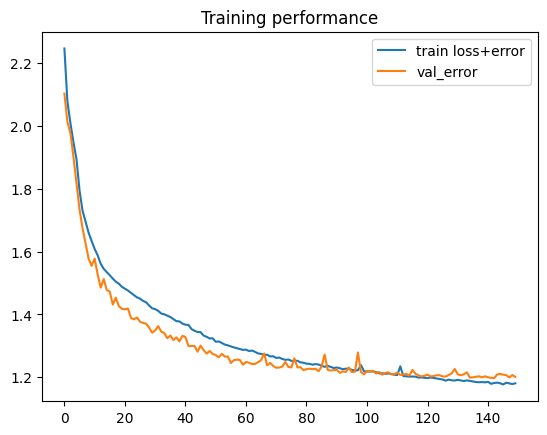

In [23]:
# Show loss curves
plt.figure();
plt.title('Training performance');
plt.plot(history.epoch, history.history['loss'], label='train loss+error');
plt.plot(history.epoch, history.history['val_loss'], label='val_error');
plt.legend();

Se puede observar que el error de validación con respecto al error de entrenamiento llega un punto donde deja de ser menor, aproximadamente a partir de la epoca 120, lo que podría estar indicando un sobreentrenamiento del modelo, sin embargo debido a la tolerancia que se le indicó para no parar tan rapido cuando no se lograra mejorar este error con respecto a los anteriores no se hace el early stopping en este caso.

# Confusion Matrix

A confusion matrix is a great way to see where the model (neural network) had trouble. It plots the number of times the model predicted a modulation versus the actual modulation (predicted versus true).

In [24]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

71/71 [==============================] - 1s 7ms/step


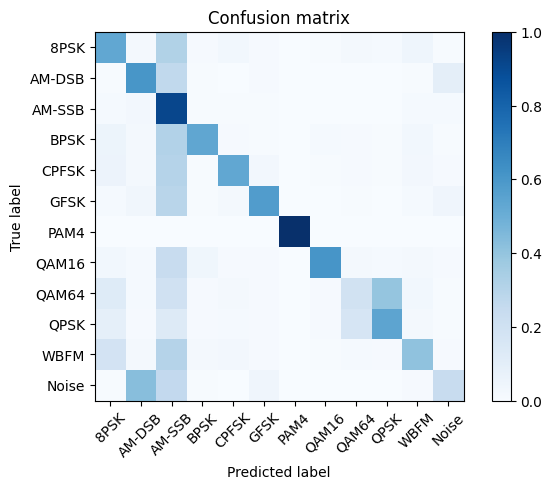

In [25]:
# Plot confusion matrix
test_Y_hat = model.predict(X_test, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)



En general se observa que para casi todas las modulaciones el modelo predice bien (con ciertos errores) que modulación se está utilizando y tomando el rango de las SNR disponibles en el dataset desde -20 dB hasta 18 dB. La modulación que mas presenta desviación es la AM-SSB, indicando que para el modelo es dificir discernir entre cualquier otra modulación de la banda lateral única, lo que indica que para el modelo las caracteristicas que definen una modulación AM-SSB son muy similares a las caracteristicas de las demás modulaciones, y esto puede estar causando la confusión en el modelo. El caso contrario se observa con la modulación PAM4, el modelo con las caracteristicas que se entrena es capaz de clasificar con mucha precisión cuando se trata de esta modulación para los diferentes valores de SNR que se presentan, las carcateristicas están muy bien definidas para esta modulación.

Pleaes evaluate the model in terms of $SNR$ and their accuracy for each modulation (below is a a sample code to assess your models)

115/115 [==============================] - 0s 3ms/step
Overall Accuracy for SNR -20: 0.1715068493150685
115/115 [==============================] - 0s 3ms/step
Overall Accuracy for SNR -18: 0.1712962962962963
113/113 [==============================] - 0s 3ms/step
Overall Accuracy for SNR -16: 0.17204002223457476
111/111 [==============================] - 0s 3ms/step
Overall Accuracy for SNR -14: 0.17319065052098
113/113 [==============================] - 0s 2ms/step
Overall Accuracy for SNR -12: 0.18915929203539822
116/116 [==============================] - 0s 3ms/step
Overall Accuracy for SNR -10: 0.2284167794316644
113/113 [==============================] - 0s 2ms/step
Overall Accuracy for SNR -8: 0.31701244813278007
112/112 [==============================] - 0s 3ms/step
Overall Accuracy for SNR -6: 0.43013161579389525
115/115 [==============================] - 0s 4ms/step
Overall Accuracy for SNR -4: 0.5572560808964198
111/111 [==============================] - 0s 3ms/step
Overall Ac

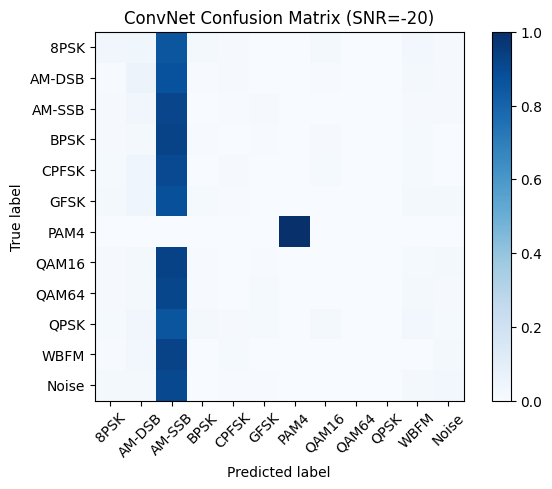

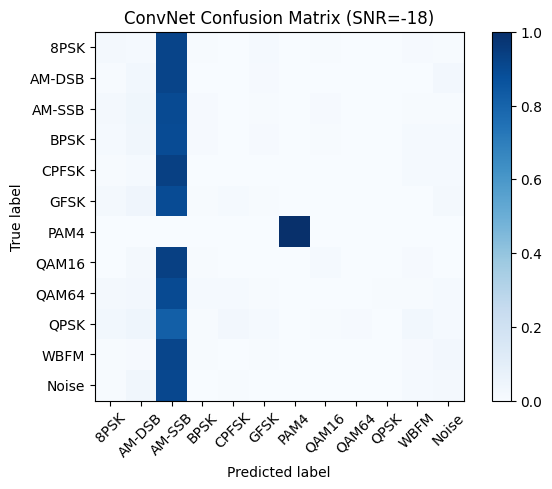

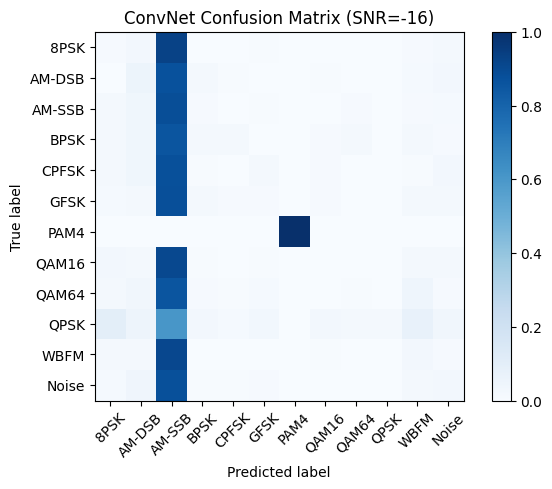

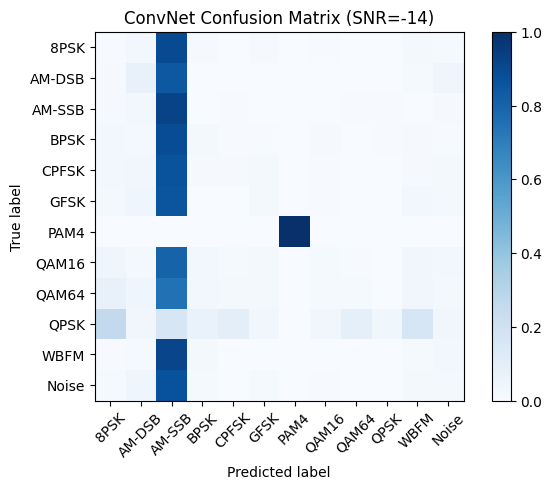

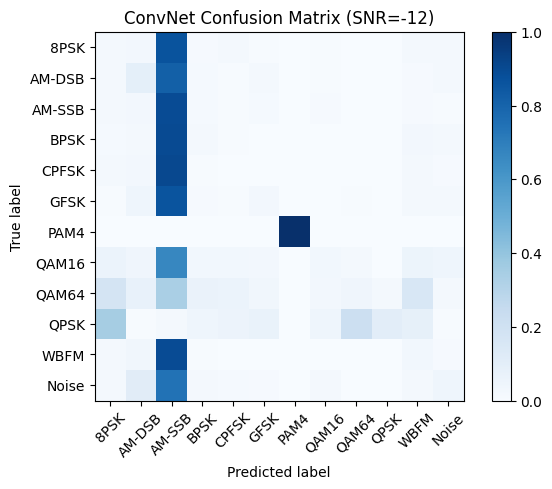

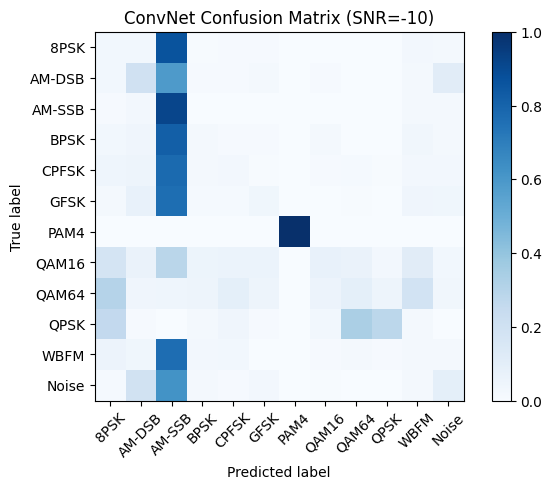

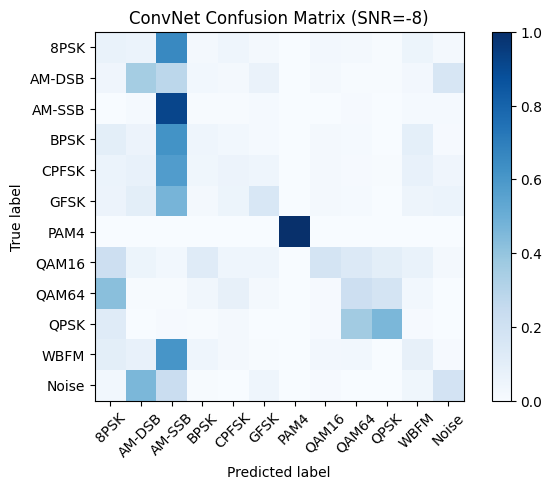

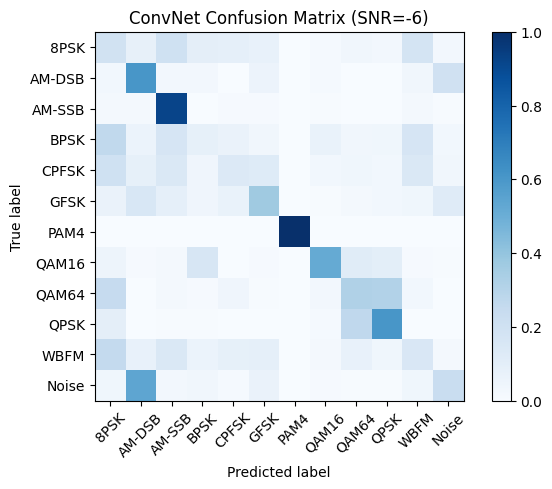

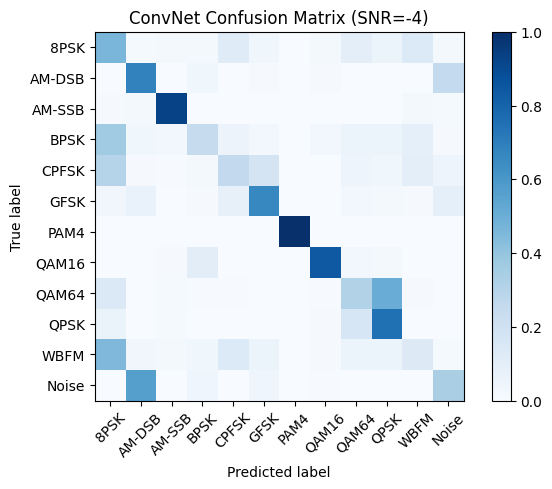

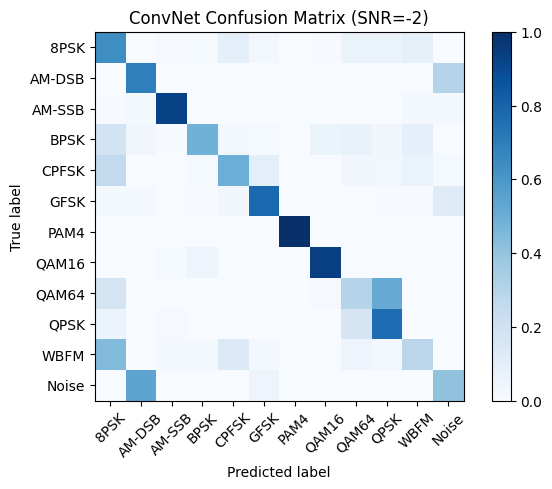

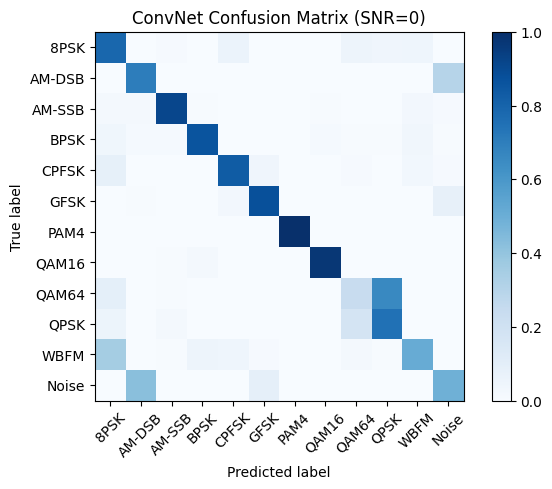

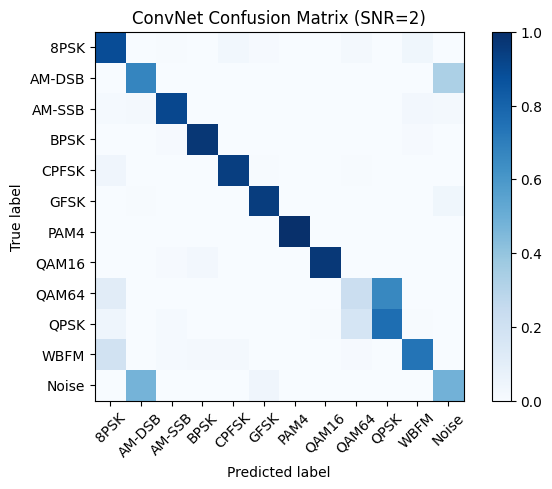

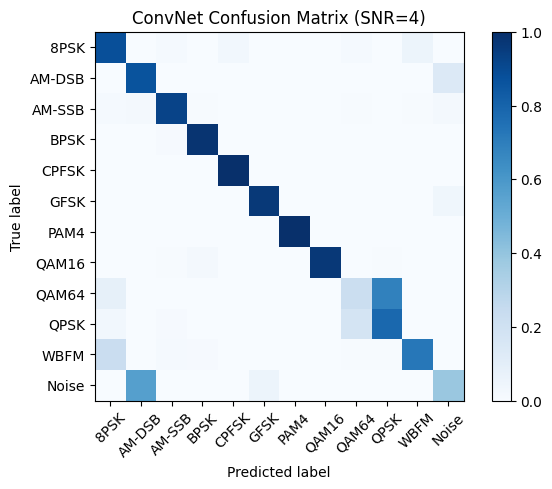

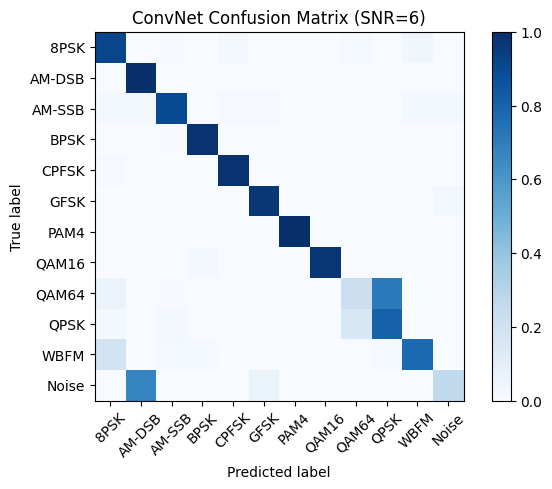

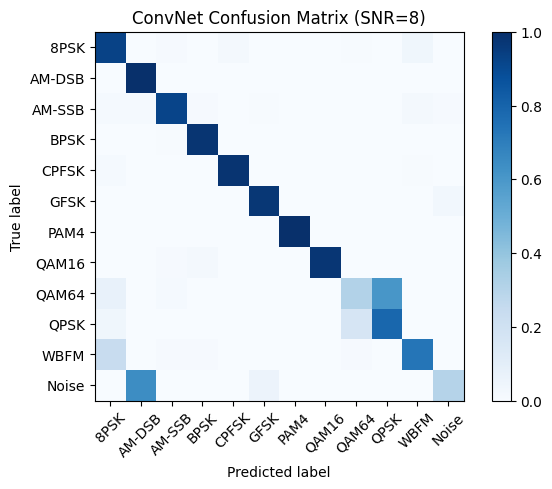

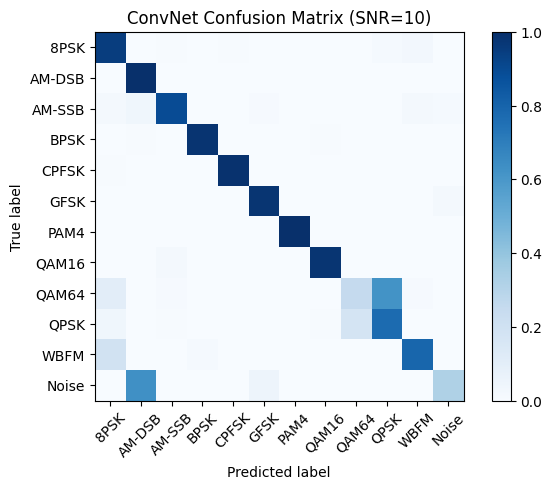

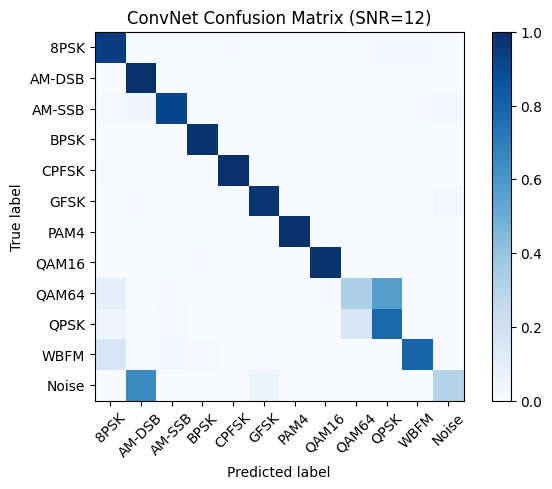

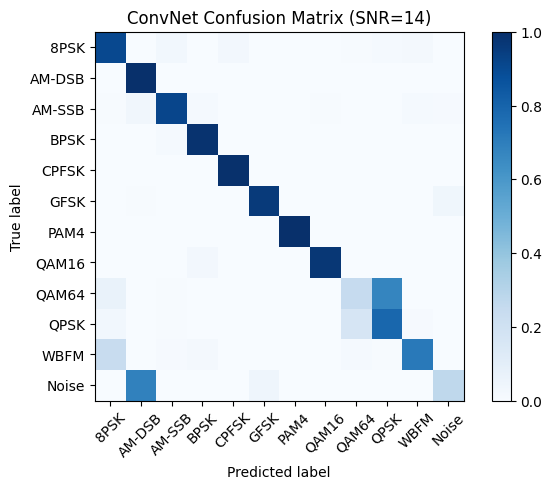

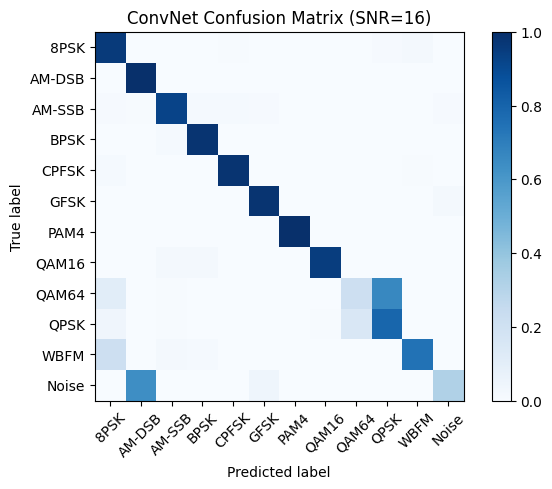

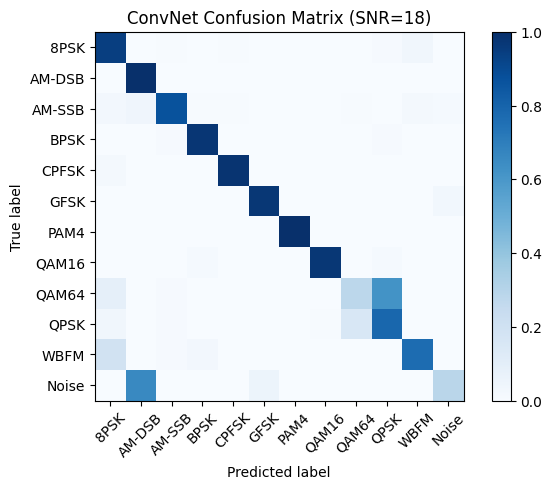

In [26]:
# Plot confusion matrix
acc = {}
for snr in snrs:

    # extract classes @ SNR
    test_SNRs = map(lambda x: int(lbl[x][1]), test_idx)
    lista = np.array(list(test_SNRs))
    jota = np.where(lista==snr)
    test_X_i = X_test[np.where(lista==snr)]
    test_Y_i = Y_test[np.where(lista==snr)]

    # estimate classes
    test_Y_i_hat = model.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))

    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print("Overall Accuracy for SNR {}: {}".format(snr, cor / (cor+ncor)))
    acc[snr] = 1.0*cor/(cor+ncor)


Estas gráficas ayudan mucho a definir en base a la SNR original de la señal que tan preciso o no es la predicción de la modulación que se está utilizando. Se puede observar que hasta una SNR de -6 dB se puede aun definir a que modulación pertenece cada señal que se mide, a partir de una SNR de -8 dB el modelo pierde precisión a la hora de definir que modulación está utilizando la señal. Y algo muy particular esque para estas bajas SNR como -20 dB y -18 dB el modelo predice que siempre se trata de una modulación AM-SSB a excepción de la modulación PAM4 la cual para cualquiera de los casos predice con mucha exactitud. Y para las SNR con valores altos la predicción es muy precisa para la mayoría de las modulaciones que se tienen.

**Nota:** El ruido, aun incluso con una SNR alta, no se predice con exactitud, se puede observar que incluso tiende mas a predecirse como una modulación AM-SSB. Tambien pasa con la modulación QAM64, que a pesar de tener relaciones señales a ruido altas el modelo tiene mas a clasificarla como una QPSK.

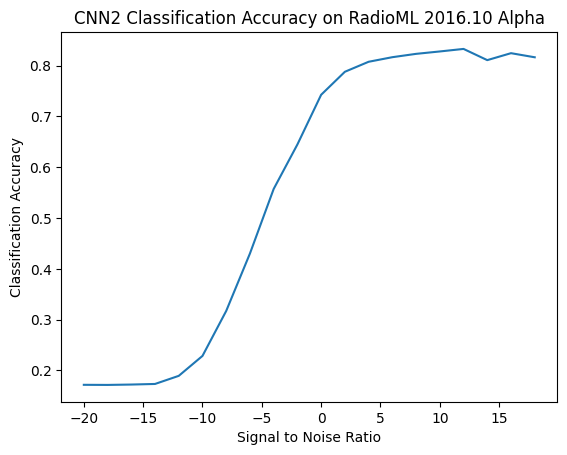

In [27]:
# Plot accuracy curve
grafica = map(lambda x: acc[x], snrs)
lista = list(grafica)
plt.plot(snrs, lista);
plt.xlabel("Signal to Noise Ratio");
plt.ylabel("Classification Accuracy");
plt.title("CNN2 Classification Accuracy on RadioML 2016.10 Alpha");

Para esta curva de SNR contra la precision de la clasificacion se puede observar que las predicciones empiezan a ser mas precisas despues de los -10 dB de SNR, lo cual nos puede indicar que aun con bajas relaciones señales a ruido aun se pueden hacer bien las predicciones, que es lo que se pretende ya que en el mundo real la señales se opacan por ruidos externos, en especial las señales que viajan por el espacio libre, ruidos termicos, del clima, de señales que interfieren con ella y otras fuentes pueden hacer que esta SNR decaiga facilmente y es necesario que el receptor detecte bien la señal aun con bajas SNR para hacer procesamientos adecuados de la señal.

# Analisis final

Se realizaron varias pruebas de arquitecturas de redes neuronales para llegar al resultado mas optimo posible, y se pudo observar que se llegaban a puntos similares donde obtener una mejoría mas significativa podría requerir de un mayor procesamiento y no solamente de modificar las capas de la red neuronal, tambien se puede deber a como se compone el dataset y como el modelo predice cada clasificación de la correspondiente modulación. La siguiente tabla muestra el resumen de las mejores arquitecturas que se midieron y la metrica de $Accuracy$ promedio que entregaba el reporte de clasificación:

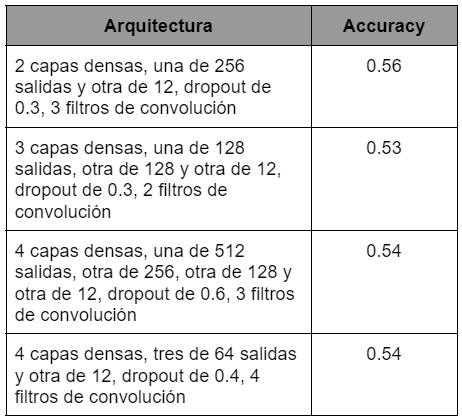


En la analítica de datos y los modelos predictivos siempre se deben tener muchas consideraciones y métricas en cuenta a la hora de hacer reportes y entregar resultados, ya que cualquier variación tanto en la base de datos como en la construcción del modelo tendrá un impacto positivo o negativo en el resultado de las predicciones que se pretendan hacer, en este caso se ha llevado el modelo a una precisión aceptable considerando de que las señales con menos SNR, es decir, con mas ruido son muy dificiles de identificar y clasificar correctamente, pero esto no significa que el modelo sea malo, ya que nignun modelo va a ser 100% preciso, y como se menciona, depende de la claridad de los datos de entrada y como se arme la arquitectura del modelo. Algo importante que se rescata en base al cuadro anterior esque no siempre aumentar los parametros o las capas de la red neuronal implica que van a mejorar las predicciones, no es una relación directamente proporcional, en este caso la aqrquitectura con menos capas densas es el que mejor se pudo ajustar y el que entrega la curva de resultados mas precisa de los intentos hechos para este proyecto.

# Conclusiones

- Con la base de datos que se proporciona para este reto se puede hacer un clasificador muy bueno de modulación de señales para un cierto rango de relaciones señales a ruido, con los experimentos realizados se puede acotar este rango entre unos -4 dB en adelante, lo cual es algo bueno en un receptor para poder recuperar señales que han sufrido atenuaciones en su viaje, no obstante en la realidad las SNR pueden ser mucho mas bajas y requieren de modelos mucho mas precisos para poder recuperar estas señales tan debiles y que se camuflan muy facil con el ruido, para mejorar el modelo se podría considerar agregar o quitar caracteristicas de la super matriz **X** para evaluar el impacto con respecto a los modelos realizados.

- Las caracteriticas propias de una señal modulada pueden ser simples de identificar con la vista (ver patrones propios de las modulaciones o el espectro que cada una genera en frecuencia) pero para los modelos de deep learning y en general de IA estas caracteristicas y su relación entre ellas se define por muchas otras cosas, se puede evidenciar esto con el caso de la modulación AM-SSB que es facilemente confinduble por el modelo con el resto de modulaciones. Corregir esto depende como se ha mencionado previamente de hacer modificaciones tanto en la base de datos como en el modelo.

- En la practica se cuentan con bases de datos que a veces no entregan la suficiente información para que las predicciones puedan ser mejores, es deber del ingeniero ver como optimizar el uso de estas bases de datos y analizar el comportamiento que presentan al entrenar los modelos de deep learning, por ejemplo con los comportamientos medidos en la curva de SNR contra la presición de la clasificación que se llegaba a un punto que por mas que se optimizara el modelo la mejora en la precisión no pasaba de un limite a la hora de crecer, que en este caso son aproximadamente los -10 dB.